# Weekend Challenge

In [1]:
from OFDM import *
%matplotlib inline

Read data file

In [2]:
received_data = pd.read_csv("gr5file.csv", header=None, delimiter=r"\s+")
received_data = received_data.values[0]

Read channel file

In [3]:
channel_data = pd.read_csv("gr5channel.csv", header=None, delimiter=r"\s+")
channel_data = channel_data.values[0]

Setup OFDM with given DFT size, CP and modulation

In [4]:
wc = CamG(1024, 32, "QPSK")

Channel Data

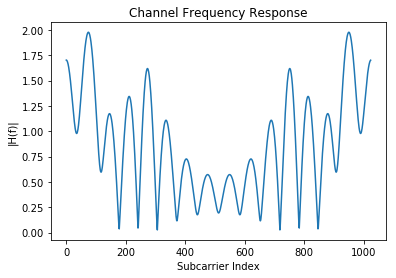

In [5]:
H = np.fft.fft(channel_data, wc.K)
plt.plot(wc.all_carriers, abs(H))
plt.title("Channel Frequency Response")
plt.xlabel("Subcarrier Index")
plt.ylabel("|H(f)|")

Reshape the data into groups of 1056 (number of subcarriers) - these are the OFDM symbols.

Then remove the cyclic Prefix from each symbol

Resulting data is a np array of 350 OFDM symbols each 1024 long

In [6]:
received_data_p = received_data.reshape(-1,1056)

received_no_cp = wc.remove_cp(received_data_p)
received_no_cp.shape

(350, 1024)

Compute DFT on each OFDM symbol

In [7]:
OFDM_demod = FFT(received_no_cp)
OFDM_demod.shape

(350, 1024)

Equalise the data using the channel coefficients

Only take symbols 1-511 (is this the right thing to do??)

In [8]:
symbols = equalise(OFDM_demod, H)
symbols = symbols[:,1:512]
symbols.shape

(350, 511)

Demap the symbols to bits using the min dist decision rule

In [9]:
data_P, decisions = wc.demap(symbols)
print(data_P.shape)

(350, 511, 2)


Convert parallel data to serial bit stream

Jossy said 2 bit groups were added at the end to make up to 511, not sure what this means needs to be removed

In [10]:
data = wc.PS(data_P)
len(data)

357700

In [33]:
a = np.packbits(data)
file_data = a[17:]
file_name = a[:10]
file_size = a[11:16]
file_name = "".join([chr(item) for item in file_name])
file_size = "".join([chr(item) for item in file_size])
print(file_name,file_size)
file_data = file_data[:int(file_size)]
len(file_data)

y5tv9o.wav 44612


44612

In [34]:
import scipy.io.wavfile
from IPython.display import Audio

scipy.io.wavfile.write(r"y5tv9o.wav", 8000, file_data)

Audio("y5tv9o.wav")